<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/orIC_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of replication origins by calculating DNA structural properties

In [5]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-01-14 19:58:36--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt.1’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.03s   

2021-01-14 19:58:36 (3.91 MB/s) - ‘positive-sequences.txt.1’ saved [123928/123928]

--2021-01-14 19:58:37--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting re

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np


In [16]:
parameters=open("/content/90_sdandard.txt")
data_parameters=pd.read_csv(parameters,delimiter="\t")

In [17]:
data_parameters.head()

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99


In [21]:
data_parameters.describe()

,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.222222,-0.022333,0.375333,0.145000,-0.178000,0.020111,0.180333,0.056889,0.052889,-0.237667,0.168889,-0.138111,-0.260222,-0.415889,-0.039889,0.068889
std,0.952184,0.548620,1.207512,0.918965,0.697511,0.957133,0.907413,1.197706,1.294959,0.864546,0.973112,0.703265,0.866836,1.261291,0.555800,0.916169
min,-1.690000,-1.370000,-2.460000,-2.100000,-1.750000,-2.020000,-2.100000,-2.380000,-2.870000,-1.970000,-1.690000,-1.750000,-1.970000,-2.370000,-1.370000,-2.020000
25%,-0.530000,-0.390000,-0.395000,-0.560000,-0.617500,-0.770000,-0.490000,-0.877500,-1.035000,-0.860000,-0.660000,-0.552500,-0.897500,-1.370000,-0.407500,-0.692500
50%,0.155000,-0.035000,0.335000,0.125000,-0.125000,0.050000,0.145000,-0.050000,-0.040000,-0.245000,0.030000,-0.120000,-0.300000,-0.680000,-0.035000,0.075000
75%,1.080000,0.277500,1.370000,0.970000,0.150000,0.587500,1.000000,1.022500,1.335000,0.245000,1.050000,0.215000,0.280000,0.382500,0.277500,0.650000
max,2.080000,1.230000,2.520000,1.660000,1.590000,2.520000,1.660000,3.160000,2.360000,2.010000,2.080000,1.590000,2.010000,3.420000,1.230000,2.200000


In [24]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [25]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [30]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [113]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=np.zeros(90)
  for pos in (0,298):
    seq_data+=np.array(data_parameters[p_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(1) 

In [114]:
for seq in range(len(n_data)):
  seq_data=np.zeros(90)
  for pos in (0,298):
    seq_data+=np.array(data_parameters[n_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(0) 

In [115]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)

In [116]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

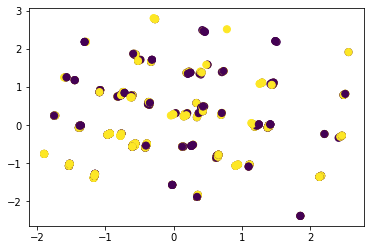

In [95]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(X)
x_pca=pca.transform(X)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,marker="o",s=50)

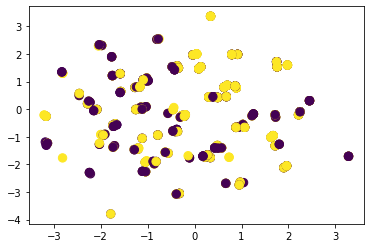

In [98]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
x_mds=mds.fit_transform(X)
plt.scatter(x_mds[:,0],x_mds[:,1],c=y,marker="o",s=70)

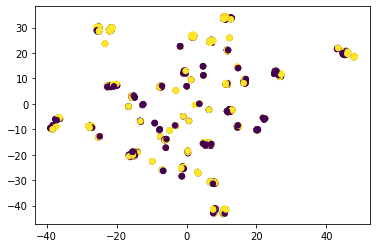

In [99]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)
x_tsne=tsne.fit_transform(X)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,s=30)

In [75]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.26019279592730143

In [79]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(x_train, y_train)
np.mean((linlasso.predict(x_test)-y_test)**2)

0.2500270116150744

In [120]:
from sklearn.svm import LinearSVC
#for c in range(5):
#  clf = LinearSVC(C=10**c).fit(x_train, y_train)
#  print(np.mean((clf.predict(x_test)-y_test)**2))
svc = LinearSVC(C=10**3,max_iter=10000).fit(x_train, y_train)
print(np.mean((clf.predict(x_test)-y_test)**2))

0.3891625615763547


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [88]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(x_train,y_train)
print(np.mean((clf.predict(x_test)-y_test)**2))

0.5467980295566502


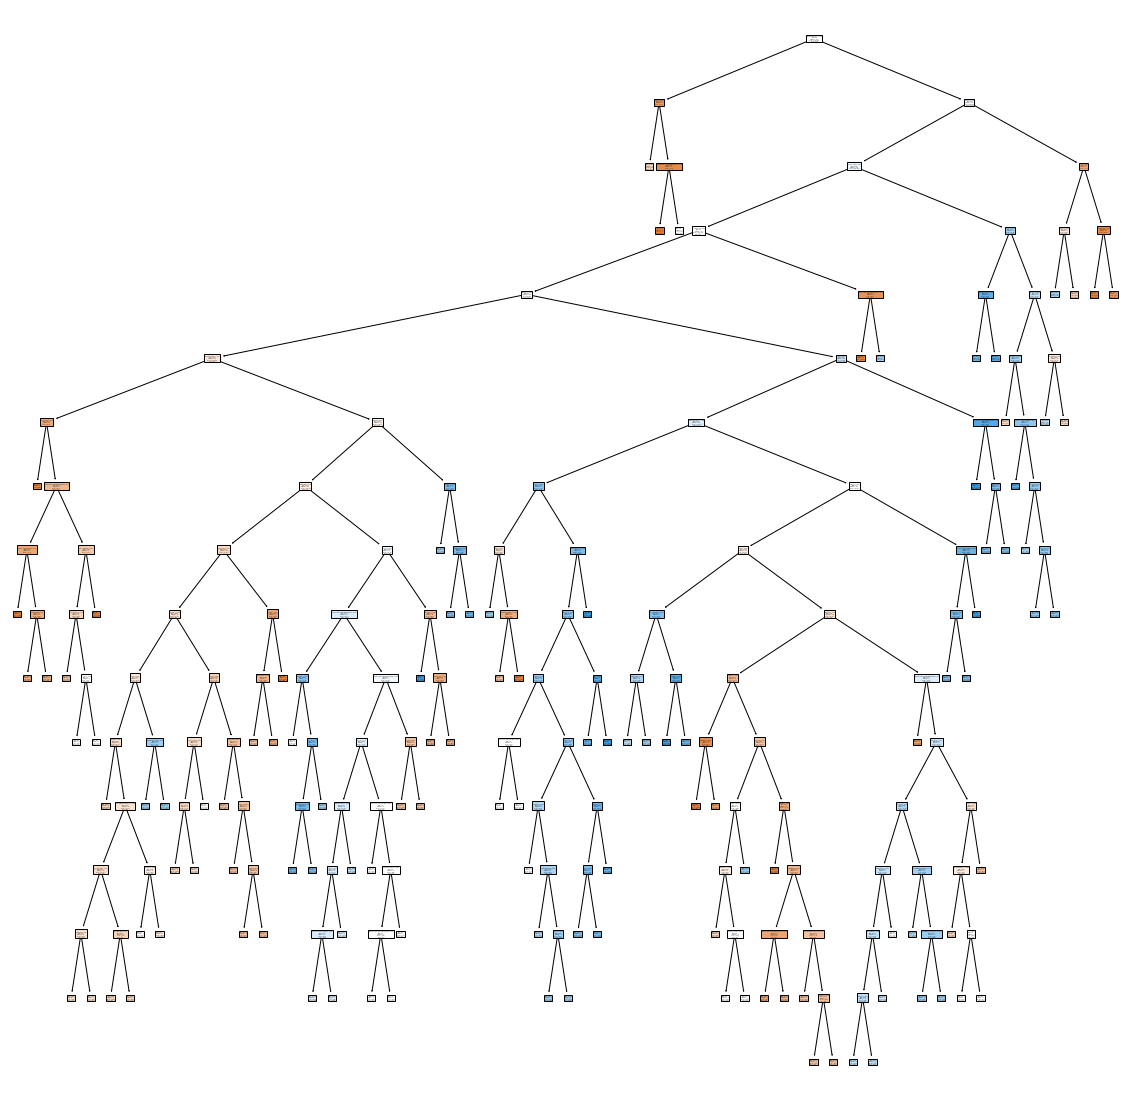

In [91]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, 
                   feature_names=np.array(data_parameters["Physicochemical properties"]),  
                   class_names=["true","false"],
                   filled=True)
plt.show()

In [106]:
y_train=np.array(y_train)

In [111]:
import tensorflow as tf
import tensorflow.keras as keras
model=keras.Sequential([
   keras.layers.Dense(1024,input_shape=(90,),activation=tf.nn.relu),
   keras.layers.Dense(512,activation=tf.nn.relu),
   keras.layers.Dense(5,activation=tf.nn.softmax)                     
])
model.summary()
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy")
model.fit(x_train,y_train,epochs=3)
model.evaluate(x_test,np.array(y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              93184     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 2565      
Total params: 620,549
Trainable params: 620,549
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
19/19 [==============================] - 1s 11ms/step - loss: 0.9758
Epoch 2/3
19/19 [==============================] - 0s 10ms/step - loss: 0.6909
Epoch 3/3
7/7 [==============================] - 0s 3ms/step - loss: 0.7524


0.7524327039718628

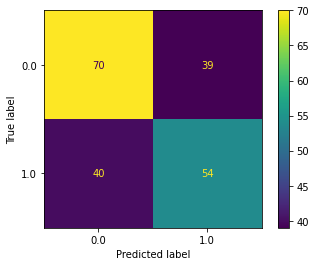

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()  

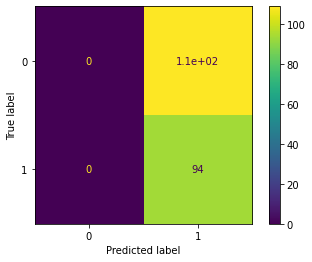

In [121]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()